## Independent work 2
# (Transportation Problem)

1)Declare two lists and fill them with demand of plantsand supply of mines<br>
2)Declare anadjacency matrix (2d array) and fill it with associated transportation costs<br>
3)Draw (plot) a graph(it maylook differently)<br>
4)Solve the problem usingthe inbuiltMin-Cost-Max-Flow algorithm(max_flow_min_cost). The problem is unbalancedand you have to balance it firstly.<br>
5)Display the optimal transportation plan<br> 
6)Display the total cost of the transportation plan<br>
7)Writea concise report that contains: 
<code><br>
  1) title page with your name, surname and student code;<br>
  2) task description and your individual variant;<br>
  3)screenshots of the outputs with comments; <br>
  4) pictures; <br>
  5) source code  <br></code>
8)Submitthe reportto the Moodle 

Library intialize


In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

1.Declare two lists and fill them with demand of plantsand supply of mines

In [2]:
G = nx.DiGraph()

mine_nodes = [['Mine 1',-41],['Mine 2',-47],['Mine 3',-40]]
plant_nodes = [('Plant 1',47),('Plant 2',47),('Plant 3',45)]

edges_list = [('Mine 1 -41', 'Plant 1 47', 10.1),('Mine 1 -41', 'Plant 2 47', 12.2),('Mine 1 -41', 'Plant 3 45', 10.4),
              ('Mine 2 -47', 'Plant 1 47', 11.8),('Mine 2 -47', 'Plant 2 47', 3.6),('Mine 2 -47', 'Plant 3 45', 12.7),
              ('Mine 3 -40', 'Plant 1 47', 8.9),('Mine 3 -40', 'Plant 2 47', 6.6),('Mine 3 -40', 'Plant 3 45', 3)]

In [3]:
def add_nodes_from_list(Graph,list):
  for x in range(0,len(mine_nodes)): # Select from list, create a type name (Mine x XX).
    G.add_node(list[x][0]+" "+str(list[x][1]),demand=list[x][1])

add_nodes_from_list(G,mine_nodes)
add_nodes_from_list(G,plant_nodes)

for position in  edges_list:   # Assign the weights to the graph
  G.add_edge(position[0],position[1],weight=position[2])

 2.Declare anadjacency matrix (2d array) and fill it with associated 

In [4]:
adjMatrix = nx.to_numpy_matrix(G)
print(adjMatrix)

[[ 0.   0.   0.  10.1 12.2 10.4]
 [ 0.   0.   0.  11.8  3.6 12.7]
 [ 0.   0.   0.   8.9  6.6  3. ]
 [ 0.   0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   0.   0. ]]


3.Draw (plot) a graph

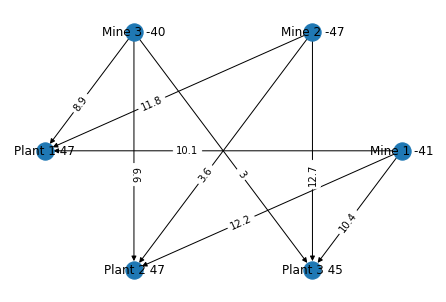

In [5]:
pos = nx.circular_layout(G)  
weights = nx.get_edge_attributes(G, "weight")
nx.draw(G, pos, with_labels=True) #make graph with weights ploting 
nx.draw_networkx_edge_labels(G, pos, edge_labels=weights,label_pos=0.4)
plt.show()

4.1
The problem is unbalancedand you have to balance it firstly.

In [6]:
def balance_suply(nodes_list_mine,nodes_list_plant):#calculate difference of demand between Mines and Plants
  mine_sum = 0
  plant_sum = 0
  for count in range(0,len(nodes_list_mine)): #for mines
    mine_sum += nodes_list_mine[count][1]
  for count in range(0,len(nodes_list_plant)): #for pants
    plant_sum += nodes_list_plant[count][1]
  return mine_sum+plant_sum # plus => mines demand < 0 

def add_balanced_points(self_mine_nodes,self_plant_nodes):
  balnced_node_name = "Mine "+str(len(self_mine_nodes)+1)+" "+str(balance_suply(self_mine_nodes,self_plant_nodes)) #make new node name
  G.add_node(balnced_node_name,demand=balance_suply(self_mine_nodes,self_plant_nodes)*-1)
  maximum_weight=max(edges_list, key=lambda item: item[2]) # search maximum value from weights
  for x in range(0,len(self_mine_nodes)): # make edges between new nodes and old nodes
    G.add_edge(str(balnced_node_name), str(self_mine_nodes[x][0])+" "+str(self_mine_nodes[x][1]),weight=maximum_weight[2])

add_balanced_points(mine_nodes,plant_nodes)


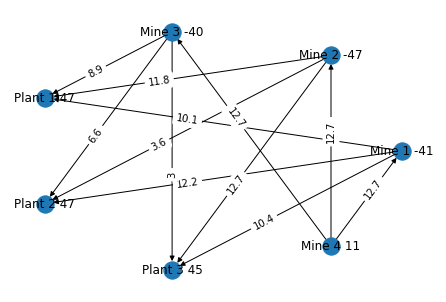

In [7]:
pos = nx.circular_layout(G)
weights = nx.get_edge_attributes(G, "weight")
nx.draw(G, pos, with_labels=True)
nx.draw_networkx_edge_labels(G, pos, edge_labels=weights,label_pos=0.4)
plt.show()

4.2 Solve the problem usingthe in built Min-Cost-Max-Flow algorithm(max_flow_min_cost). 

In [8]:
def flowDict_calculation(Graph):
  return nx.min_cost_flow(Graph)
  
def total_costst_calculation(Graph):
  return nx.cost_of_flow(Graph, flowDict, weight='weight')

flowDict=flowDict_calculation(G)

def make_optimal_plan(self_flowDict):
  supply = ['Mine 1 -41', 'Mine 2 -47', 'Mine 3 -40']
  demand = ['Plant 1 47', 'Plant 2 47', 'Plant 3 45']
  for i in supply:
    for j in demand:
      print('From ', i, ' to ', j, ': {}'.format(self_flowDict[i][j]))

make_optimal_plan(flowDict)

From  Mine 1 -41  to  Plant 1 47 : 41
From  Mine 1 -41  to  Plant 2 47 : 0
From  Mine 1 -41  to  Plant 3 45 : 0
From  Mine 2 -47  to  Plant 1 47 : 0
From  Mine 2 -47  to  Plant 2 47 : 47
From  Mine 2 -47  to  Plant 3 45 : 0
From  Mine 3 -40  to  Plant 1 47 : 6
From  Mine 3 -40  to  Plant 2 47 : 0
From  Mine 3 -40  to  Plant 3 45 : 45


5.Display the optimal transportation plan

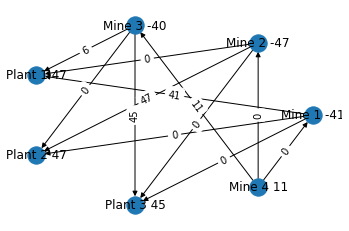

In [9]:
def make_edges_from_flowdict(Graph,flowDict):
  optimaze_graph_edges = list()
  for noda in list(Graph):
    suplDict = flowDict.get(noda)
    for key,value in suplDict.items():
      optimaze_graph_edge=(noda,key,value)
      optimaze_graph_edges.append(optimaze_graph_edge) 
  return optimaze_graph_edges






b = nx.DiGraph(flowDict)#create new optimize

for position in  edges_list:  # add weights 
  b.add_edge(position[0],position[1],weight=position[2])

pos = nx.circular_layout(b)
weights = nx.get_edge_attributes(b, "weight")

optimaze_graph_edges = make_edges_from_flowdict(G,flowDict)
b.add_weighted_edges_from(optimaze_graph_edges)
posSolution = nx.circular_layout(G)

weights = nx.get_edge_attributes(b, "weight")
nx.draw_networkx_edge_labels(b,pos,edge_labels=weights)
nx.draw(b, posSolution, with_labels=True)

6.Display the total cost of the transportation plan

In [10]:
def total_cost_calculation(Graph):
  return nx.cost_of_flow(Graph, flowDict, weight='weight')
print('Total cost %f ' % (total_cost_calculation(G)))

Total cost 911.400000 
